# Settings

In [53]:
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

In [54]:
data_path = Path("data")

if not data_path.exists():
    os.makedirs(data_path)

In [55]:
import pickle


def save_dict(dict, file_path):
    with open(file_path, "wb") as f:
        pickle.dump(dict, f)


def load_dict(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

## Load annotation

In [56]:
anti_gnd = load_dict(file_path="annotation/anti_gnd.pkl")

query = load_dict(file_path="annotation/query.pkl")

In [57]:
landmarks = list(query.keys())

len(landmarks)

46

In [58]:
imlist = dict()

for key in landmarks:
    imlist[key] = []
    for filename in os.listdir(os.path.join(data_path, key)):
        file_idx = int(filename.split(".")[0])
        # select only jpg files not in query set
        if filename.endswith(".jpg") and file_idx not in query[key]:
            imlist[key].append(filename)

In [59]:
ground_truth = dict()

for key in landmarks:
    ground_truth[key] = []
    for filename in os.listdir(os.path.join(data_path, key)):
        file_idx = int(filename.split(".")[0])
        # select only jpg files in ground truth set
        if (
            filename.endswith(".jpg")
            and file_idx not in anti_gnd[key]
            and file_idx not in query[key]
        ):
            ground_truth[key].append(filename)

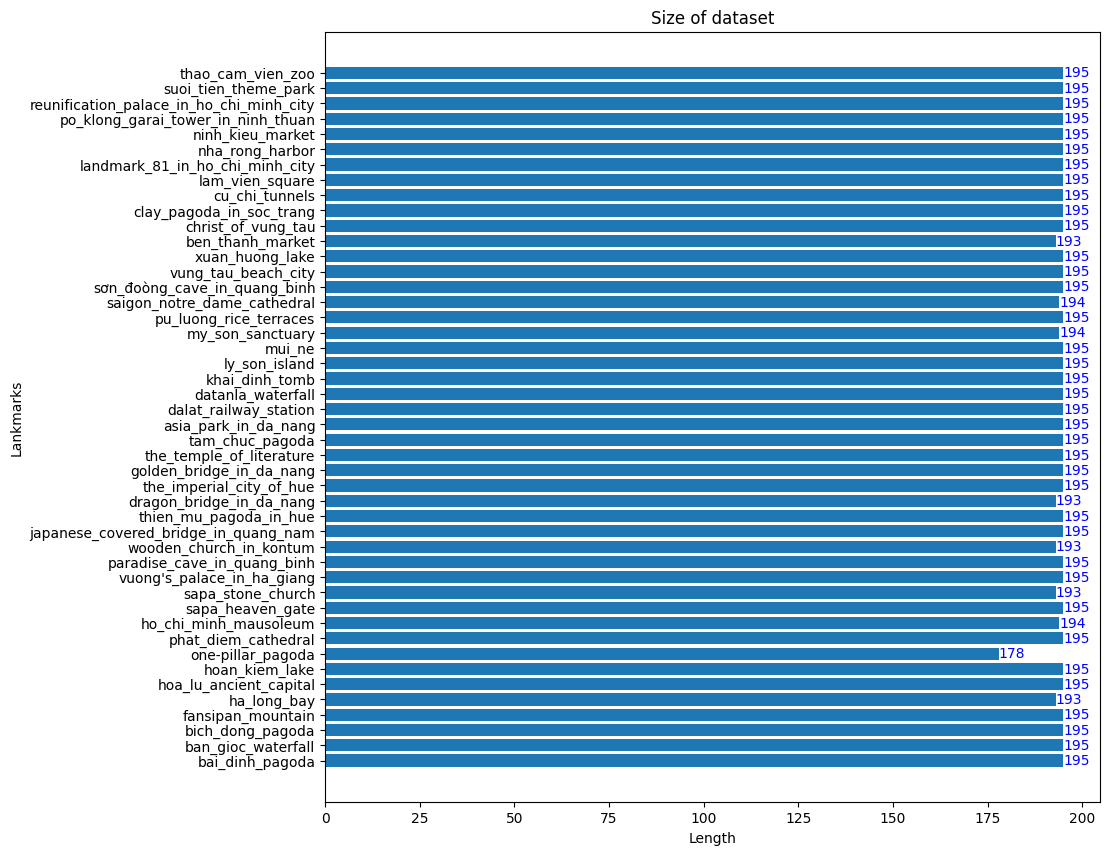

In [60]:
# Get the lengths of each value in imlist
lengths = [len(value) for value in imlist.values()]

# Get the keys of imlist
keys = list(imlist.keys())

plt.figure(figsize=(10, 10))
# Plot the horizontal bar chart
plt.barh(keys, lengths)
plt.xlabel("Length")
plt.ylabel("Lankmarks")
plt.title("Size of dataset")

# Add length numbers at the tip of each bar
for i, v in enumerate(lengths):
    plt.text(v, i, str(v), color="blue", va="center")

plt.show()

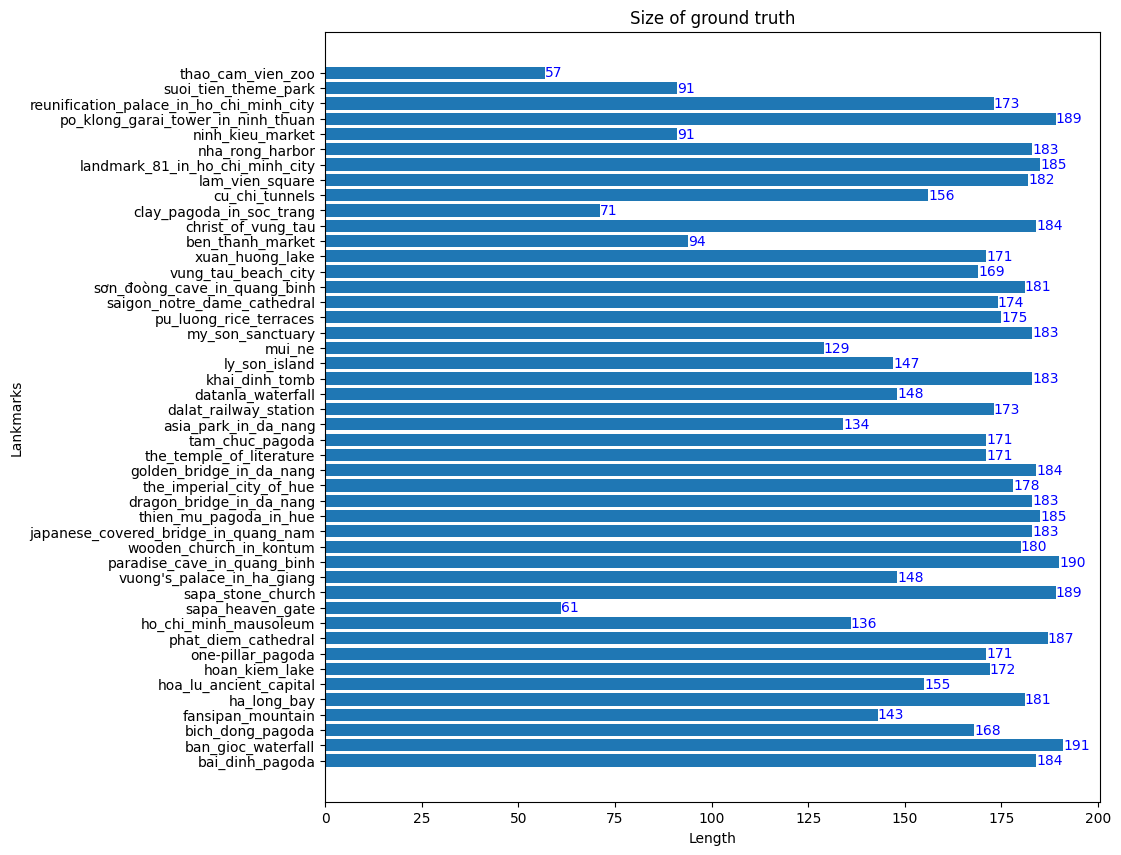

In [61]:
lengths = [len(value) for value in ground_truth.values()]

plt.figure(figsize=(10, 10))
plt.barh(keys, lengths)
plt.xlabel("Length")
plt.ylabel("Lankmarks")
plt.title("Size of ground truth")

for i, v in enumerate(lengths):
    plt.text(v, i, str(v), color="blue", va="center")

plt.show()

In [62]:
def plot_images(images, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [63]:
def get_query_paths(landmark):
    indices = query[landmark]
    return [os.path.join(data_path, landmark, f"{idx}.jpg") for idx in indices]

In [64]:
paths = []

for landmark in landmarks:
    paths.extend(get_query_paths(landmark))

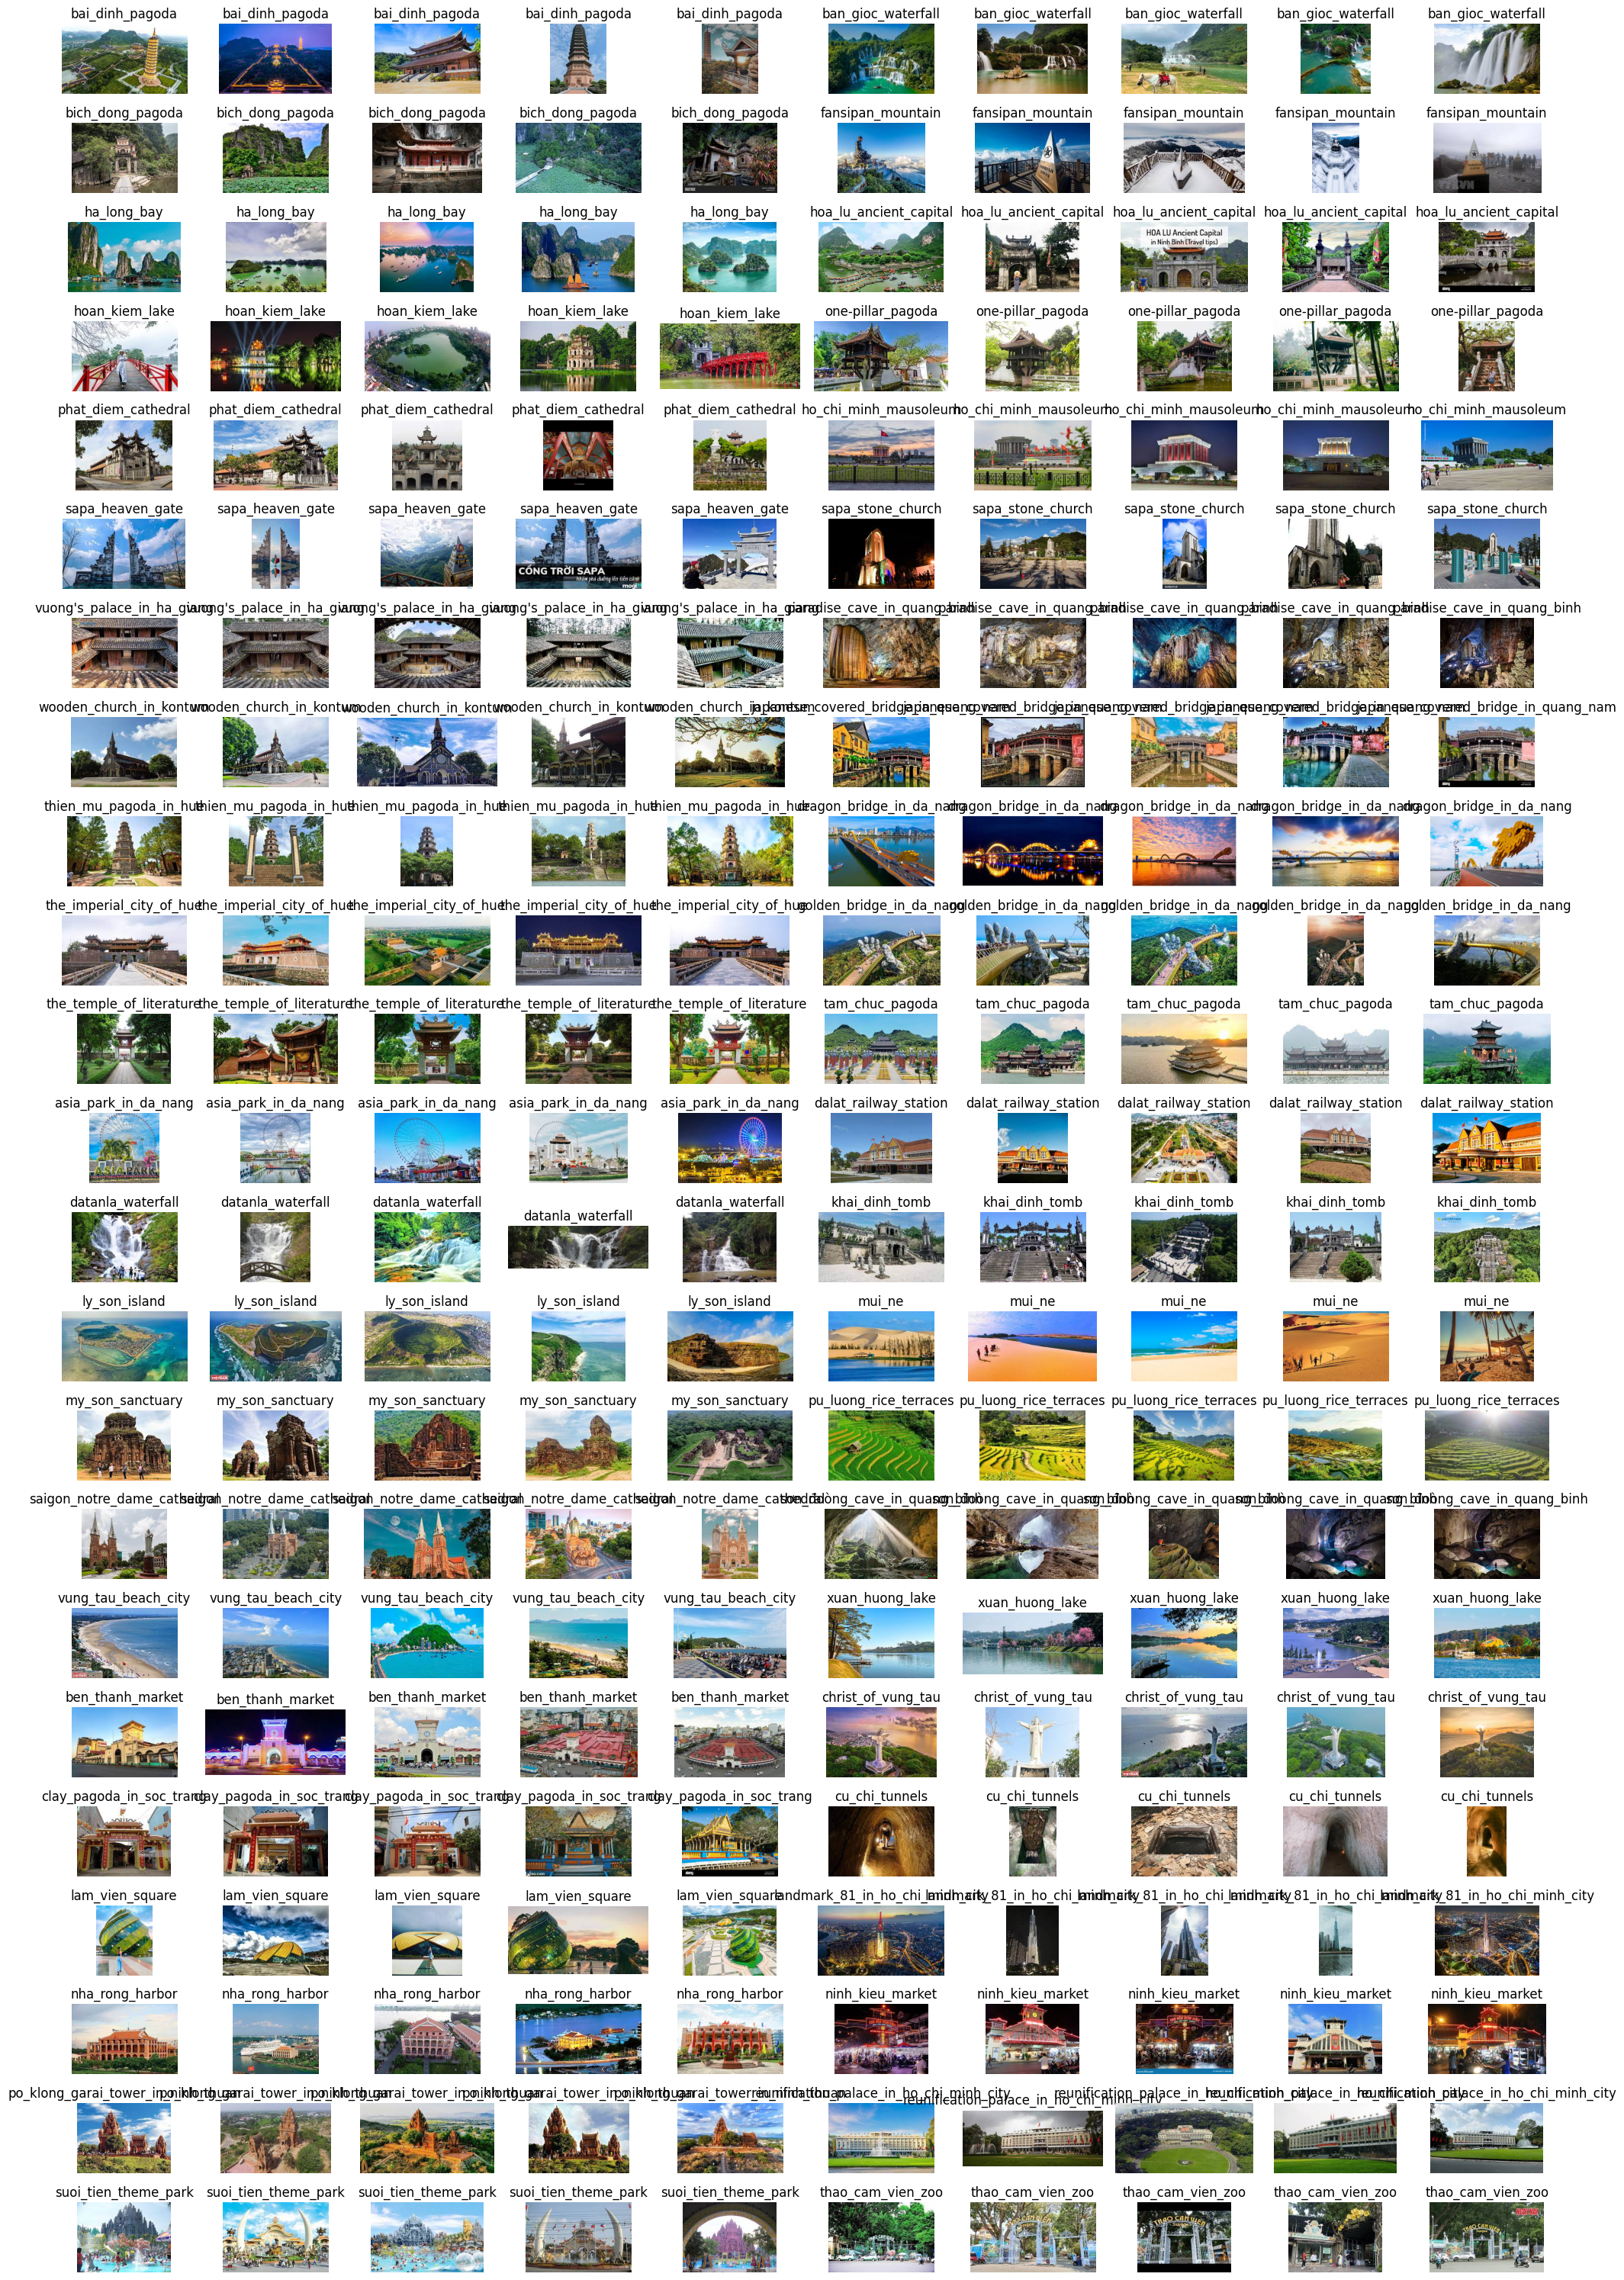

In [65]:
images = [plt.imread(path) for path in paths]
titles = []

for p in paths:
    _, lm_name, file_id = p.split("\\")
    titles.append(lm_name)

plot_images(images, titles, rows=len(landmarks) // 2, cols=10)